How many of the most popular passwords are secure?
Based on common_passwords dataset from https://www.kaggle.com/shivamb/10000-most-common-passwords

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
all_passwords = pd.read_csv('C:/Users/igors/Desktop/Data Science/Jupyter Notebooks/datasets kaggle/common_passwords.csv')
print(all_passwords.shape)
all_passwords.head()

(10000, 9)


,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
0,123456,6,0,6,0,0,0,0,1
1,password,8,8,0,0,8,0,2,2
2,12345678,8,0,8,0,0,0,0,1
3,qwerty,6,6,0,0,6,0,1,3
4,123456789,9,0,9,0,0,0,0,1


In [67]:
all_passwords.isna().sum()

password         0
length           0
num_chars        0
num_digits       0
num_upper        0
num_lower        0
num_special      0
num_vowels       0
num_syllables    0
dtype: int64

There are no NaN values, which means we can continue without dropping any rows

What makes a password secure?
<br>
According to https://www.gvec.net/five-tips-for-creating-a-strong-password/, there are 3 main factors:
<br>
Password length
<br>
Using numbers and capital letters
<br>
Not using obvious words
<br>
By these criteria, I will check how many of 10 000 most popular passwords are secure.

Starting with password length, secure password is considered at least 8 characters long.

In [68]:
secure_passwords = all_passwords[all_passwords['length'] >=8]
secure_passwords.shape

(3337, 9)

As we can see, more than 66% of the most popular passwords are not long enough. Now let's check those with symbols, numbers and capital letters.

In [69]:
secure_passwords = secure_passwords[(secure_passwords['num_chars'] > 0) & (secure_passwords['num_digits']>0)
                                    & (secure_passwords['num_upper'] > 0) & (secure_passwords['num_lower']>0)]
secure_passwords.shape

(24, 9)

In [70]:
secure_passwords

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
710,Usuckballz1,11,10,1,1,9,0,2,3
1215,Soso123aljg,11,8,3,1,7,0,3,1
2201,Mailcreated5240,15,11,4,1,10,0,5,4
2664,Passw0rd,8,7,1,1,6,0,1,2
2697,8J4yE3Uz,8,5,3,3,2,0,0,1
3067,Password1,9,8,1,1,7,0,2,2
3162,Turkey50,8,6,2,1,5,0,2,1
3328,1Passwor,8,7,1,1,6,0,2,2
3338,Sojdlg123aljg,13,10,3,1,9,0,2,3
3919,Passwor1,8,7,1,1,6,0,2,2


As we can see in the DataFrame above, only 0.24% of the most popular password would be secure before checking criteria number 3, which is not using obvious words. We can see that among those passwords, some of them are popular words with added just one integer ( most with "1" at the end, and "Passw0rd" being obvious one to drop, since it is easy to hack). Let's clear these.

In [71]:
secure_passwords = secure_passwords[secure_passwords['num_digits'] > 1]
secure_passwords

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
1215,Soso123aljg,11,8,3,1,7,0,3,1
2201,Mailcreated5240,15,11,4,1,10,0,5,4
2697,8J4yE3Uz,8,5,3,3,2,0,0,1
3162,Turkey50,8,6,2,1,5,0,2,1
3338,Sojdlg123aljg,13,10,3,1,9,0,2,3
4761,PolniyPizdec0211,16,12,4,2,10,0,4,3
4861,7uGd5HIp2J,10,7,3,4,3,0,1,1
5202,vSjasnel12,10,8,2,1,7,0,2,3
6026,Good123654,10,4,6,1,3,0,2,1
7341,Misfit99,8,6,2,1,5,0,2,2


In [72]:
print(f"The number of secure passwords out of 10000 most popular is {len(secure_passwords)}")

The number of secure passwords out of 10000 most popular is 13


So, out of 10 000 most popular passwords, only 0.13% would be considered secure. This easily explaines why most people's accounts are easily hacked.<br>
Now let's check the distribution of password length.

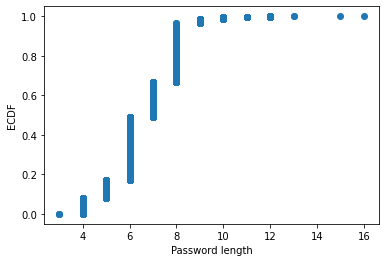

In [73]:
#Computing ECDF for password length
#n - number of data points
n = len(all_passwords['length'])
#x - x-data for ECDF
x = np.sort(all_passwords['length'])
#y - y-data for ECDF
y = np.arange(1, n+1) / n
#Generate ECDF plot
plt.scatter(x,y)
plt.xlabel('Password length')
plt.ylabel('ECDF')
plt.show()

As shown above, more than 95% of these passwords are shorter than 9 characters.<br>
Conclusion: <br>
Almost all of the most popular passwords are not secure. As long as people keep using easy to break passwords, they will be exposed to being hacked. 